In [1]:
import re
import collections
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
path = '/mnt/c/Users/alon4/Dropbox/Labs/Lab C1/Particles' 
# The path to the main folder of the experiment. Instead of C:/ at the beginning, write /mnt/c.
f = open(os.path.join(path,'Data/Second_Pi0.txt'),'r')
data = f.readlines()
f.close()

In [2]:
a1 = (2.06*10**(-2),2.67*10**(-5))
a0 = (4.51*10**(-1), 3.19*10**(-2))

In [3]:
def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text

In [6]:
end =  '    NO.  PULSE HEIGHT      X              Y              Z        YWIDTH  ZWIDTH\n'
Pulses = [i for i, x in enumerate(data) if x == end]
numbers = []

for i in Pulses:
    j = i + 1
    numbers.append([])
    while (not bool(re.search('[a-zA-Z]', data[j]))) and data[j] != '\n':
        split =[float(remove_prefix(k,'+/-')) for k in data[j].split()[1:]]
        split[1] += 10
        numbers[-1].append(split)
        j += 1

print(f'The number of acceptable results is: {len(list(filter(lambda x: len(x) == 2, numbers)))/len(numbers) * 100}')
numbers = list(filter(lambda x: len(x) == 2, numbers))
# Lack of symmetry in simulation?
# len(numbers) # PH X DX Y DY Z DZ YWIDTH ZWIDTH
# sqrt(m1^2 +m2^2 + 2E1E2(1-costheta))
print(len(numbers))

The number of acceptable results is: 86.86231018597509
5091


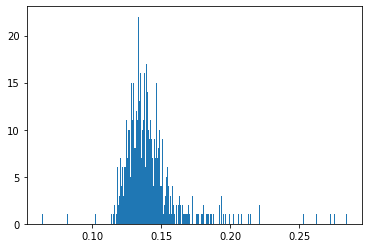

In [5]:
massSquared = []
for meas in numbers:
    xyz0 = np.array([meas[0][1],meas[0][3],meas[0][5]])
    xyz1 = np.array([meas[1][1],meas[1][3],meas[1][5]])
    cstheta = xyz0.dot(xyz1) / (np.linalg.norm(xyz0,2)*np.linalg.norm(xyz1,2))
    massSquared.append(2*(meas[0][0]*a1[0] + a0[0])*(meas[1][0]*a1[0] + a0[0])*(1-cstheta))

mass = np.sqrt(massSquared)
(events, bins, patches) = plt.hist(mass, bins=300)
plt.show()

In [44]:
events = np.array(events)
mask = events>max(events)/2
i = [0,0]
while not mask[i[0]]:
    i[0]+=1
while not mask[::-1][i[1]]:
    i[1]+=1
i[1] = len(mask) - i[1]

In [162]:
DX = [(bins[i+1]-bins[i])/2 for i in range(len(bins)-1)]
X = [(bins[i+1]+bins[i])/2 for i in range(len(bins)-1)]
gamma = X[i[1]]-X[i[0]]
DY = [np.sqrt(eve) for eve in events]
Data = np.array([X,DX,events,DY]).T
df = pd.DataFrame(Data[Data[:,2] > 0], columns=['Mass [GeV]', 'ΔMass [Gev]', 'Events', 'ΔEvents']).set_index('Mass [GeV]')
df.to_excel(excel_writer = os.path.join(path, "Fit/Second Part/Excel/Pi0_2tenth3.xlsx"))
print(gamma)

0.018346285797059325